<a href="https://colab.research.google.com/github/nichmars/Test/blob/main/AttemptAtPercentChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("Attempt_at_Imputing.xlsx")

In [2]:
# Convert predicted columns to numeric and replace invalid values
pred_cols = ["predicted_accounts", "predicted_contributions",  "predicted_grants", "predicted_assets"]

for col in pred_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.replace([np.inf, -np.inf], np.nan)

# Function to calculate relative error for a column
def relative_error(actual_col, predicted_col):
    valid_rows = df[df[predicted_col].notna()]
    total_actual = valid_rows[actual_col].sum()
    total_predicted = valid_rows[predicted_col].sum()
    RE = (total_actual - total_predicted) / total_actual
    return RE

# Compute relative errors
RE_account = relative_error("Accounts", "predicted_accounts")
RE_contributions = relative_error("Contributions", "predicted_contributions")
RE_grants = relative_error("Grants", "predicted_grants")
RE_assets = relative_error("Assets", "predicted_assets")

print("Relative Error - Account:", abs(RE_account))
print("Relative Error - Contributions:", abs(RE_contributions))
print("Relative Error - Grants:", abs(RE_grants))
print("Relative Error - Assets:", abs(RE_assets))


Relative Error - Account: 0.08151860031249465
Relative Error - Contributions: 0.15853841697327778
Relative Error - Grants: 0.1442249168460262
Relative Error - Assets: 0.14010277548647931


In [5]:
def relative_grouped_error(actual_col, predicted_col):
    valid_rows = group[group[predicted_col].notna()]
    total_actual = valid_rows[actual_col].sum()
    total_predicted = valid_rows[predicted_col].sum()
    RE = abs((total_actual - total_predicted) / total_actual)
    return RE

RE_account_by_year = []
RE_contributions_by_year = []
RE_grants_by_year = []
RE_assets_by_year = []

grouped = df.groupby("Year")
for year, group in grouped:
    RE_account_by_year.append(relative_grouped_error("Accounts", "predicted_accounts"))
    RE_contributions_by_year.append(relative_grouped_error("Contributions", "predicted_contributions"))
    RE_grants_by_year.append(relative_grouped_error("Grants", "predicted_grants"))
    RE_assets_by_year.append(relative_grouped_error("Assets", "predicted_assets"))

print(RE_contributions_by_year)

[nan, 0.11179922275597992, 0.2528071051652452, 1.5484946651252798, 0.2615892918026743, 0.3989167835029586, 0.12819870240152864, 0.3143428871489911, 0.15796459201718158, 0.10942207145180824, 0.30227857886567827, 0.11971746162500214, 0.038723132512252734, 0.20995859401160408, 0.4901839239346527, 0.19014226903015524, 0.05576747943867651, 0.2480638773967834]


C:\Users\marsh\AppData\Local\Temp\ipykernel_9232\1797480176.py:5: RuntimeWarning: invalid value encountered in scalar divide
  RE = abs((total_actual - total_predicted) / total_actual)


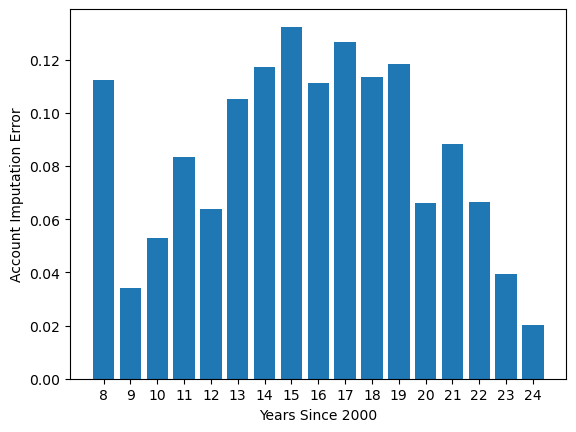

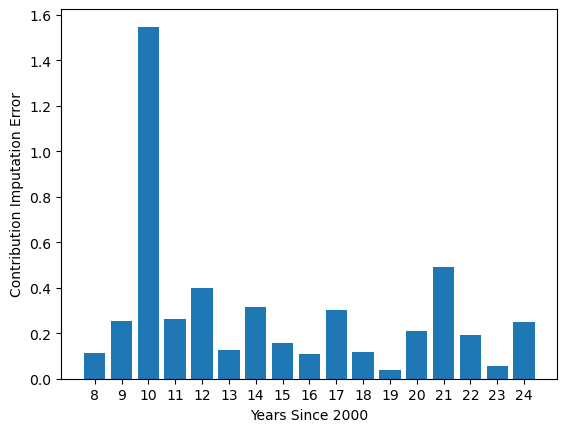

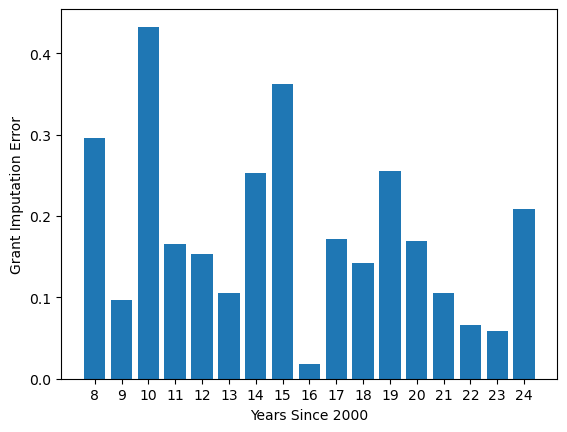

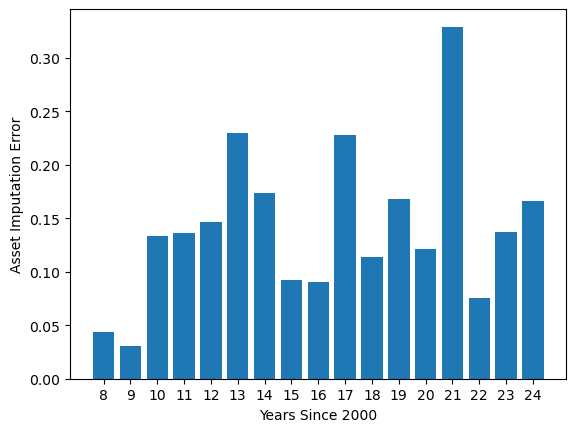

In [6]:
account_error_by_year = RE_account_by_year[1:]
contribution_error_by_year = RE_contributions_by_year[1:]
grant_error_by_year = RE_grants_by_year[1:]
asset_error_by_year = RE_assets_by_year[1:]

Year = range(7, 24)

plt.bar(Year, account_error_by_year)
plt.xlabel("Years Since 2000")
plt.ylabel("Account Imputation Error")
plt.xticks(Year, [str(i+1) for i in Year])
plt.show()

plt.bar(Year, contribution_error_by_year)
plt.xlabel("Years Since 2000")
plt.ylabel("Contribution Imputation Error")
plt.xticks(Year, [str(i+1) for i in Year])
plt.show()

plt.bar(Year, grant_error_by_year)
plt.xlabel("Years Since 2000")
plt.ylabel("Grant Imputation Error")
plt.xticks(Year, [str(i+1) for i in Year])
plt.show()

plt.bar(Year, asset_error_by_year)
plt.xlabel("Years Since 2000")
plt.ylabel("Asset Imputation Error")
plt.xticks(Year, [str(i+1) for i in Year])
plt.show()